# LFV Higgs decays in SeeSaw model ( Thao et al results) 

## In this notebook we use the mpmath implementations of PaVe functions

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from THDM_seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from THDM_seesaw_FF import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from THDM_seesaw_FF import j as jj
from THDM_seesaw_FF import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 30; mp.pretty = True

In [6]:
import numpy as np

In [7]:
import subprocess as s

In [8]:
from multiprocessing import Pool
from time import time

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

In [12]:
from sympy import cos as cos_sp
from sympy import sin as sin_sp
from sympy import cot as cot_sp
from sympy import tan as tan_sp

In [13]:
typeI_ξh = {ξlφ:cos_sp(α)/sin_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:cot_sp(β)}
typeI_ξH = {ξlφ:sin_sp(α)/sin_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:cot_sp(β)}

typeII_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:cot_sp(β)}
typeII_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:cot_sp(β)}

lepton_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:-sin_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:-tan_sp(β)}
lepton_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:-tan_sp(β)}



mA,mH, mh = symbols('m_A,m_H, m_h ',positive=True)
common_factor_h = {mϕ:mh, Ξϕ:sin_sp(β - α), ηϕ:cos_sp(β - α), Kϕ: 4*mA**2 - 3*mh**2- 2*mHpm**2, 
                   Qϕ:mh**2 - 2*mHpm**2 , ρϕ: cos_sp(α + β), Δϕ:cos_sp(α - 3*β)}

common_factor_H = {mϕ:mH, Ξϕ:cos_sp(β - α), ηϕ:-sin_sp(β - α), Kϕ: 4*mA**2 - 3*mH**2- 2*mHpm**2, 
                   Qϕ:mH**2 - 2*mHpm**2 , ρϕ: sin_sp(α + β), Δϕ:sin_sp(α - 3*β)}

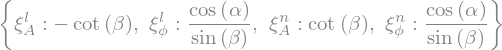

In [14]:
typeI_ξh 

### Form factor with one fermion in the loop.

#### AL one fermion 

In [15]:
from OneLoopLFVHD.data import ml

In [16]:
ma,mb = symbols('m_a,m_b',positive=True)
valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}

cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

from Unu_seesaw_2HDM import diagonalizationMnu
diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

In [17]:
for T in TrianglesOneFermion:
    display(T.AL().subs(common_factor_h).subs(typeI_ξh).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mH,mW),0).subs(
                    lfvhd.B12_0(mW,mH),0).subs(cambios_hab(2,3)).subs(valores_h
                                                                     ).subs(UnuOne).atoms(Symbol))

In [18]:
def GIM_One(exp):
    from sympy import Add
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        X = Add(*[t for t in args if t.has(mni)]).simplify()
    else:
        X = exp
    #X1 = X.collect([mni],evaluate=False)
    return X#mni**2*X1[mni**2]

In [19]:
def sumOne(m6,Aab,a,b,mHpm, mA, alpha, beta, l5,doblet): 
    mnk,Unu = diagonalizationMnu1(m1,m6,beta,doblet)
    AL = []
    for k in range(1,7):
        #print(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]))
        A = Aab(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]),mHpm, mA, alpha, beta,l5)
        #print('Ai = ',A)
        AL.append(A)
    return mp.fsum(AL)


In [20]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [21]:
Aa = TrianglesOneFermion[0].AL().subs(common_factor_h).subs(typeI_ξh).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mH,mW),0).subs(
                    lfvhd.B12_0(mW,mH),0).subs(cambios_hab(2,3)).subs(valores_h
                                                                     ).subs(UnuOne)
Aa.atoms(Symbol)

In [25]:
A = lambdify([mni,Ubi,Ucai, mHpm, mA, α, β,λ5],replaceBs(Aa),
                         modules=[pave_functions(valores_h[mh],2,3,lib='mpmath'),'mpmath'])

A(1,2,3,4,5,6,7,8)

(0.00000423040612058042450071595842556 + 0.0j)

In [26]:
# for n in mp.arange(2,10000,20):
#     mnk, U = diagonalizationMnu1(m1,mp.mpf('100'),mp.pi/n,2)
#     display(n,mnk[0])
#mnk, U = diagonalizationMnu1(m1,mp.mpf('100'),mp.mpf('1e3'),1)
mnk, U = diagonalizationMnu1(m1,mp.mpf('1000'),mp.mpf('1e-3'),2)#0.003908
mnk

[-5.19607326249788138844602862897e-12]
[-4.25430360924533672446335898331e-13]
[-4.73974417551639130875044934046e-14]
[     333.333333333334629314385606823]
[      500.00000000000291592903097567]
[     1000.00000000000145699098192842]

In [27]:
m1,m2,m3

(1.0e-12,
 8.65447860936752272472252216337e-12,
 5.02394267483218801107954910496e-11)

In [28]:
sumOne(mp.mpf('100'),A,2,3,mp.mpf('200.0'),mp.mpf('500'),mp.pi/2, mp.pi/1000, mp.mpf('0.1'),2)
# C0 = lfvhd.LFVHDFeynG_mpmath2.C0
# C1 = lfvhd.LFVHDFeynG_mpmath2.C1
# C2 = lfvhd.LFVHDFeynG_mpmath2.C2
# B1_0 = lfvhd.LFVHDFeynG_mpmath2.B1_0

(-1.88972851547667877622742749855e-20 + 0.0j)

In [45]:
mHpm_aux = symbols('mHpm',positive=True)
def numeric_sum_diagramsOne(a,b,mHpm_n, mA_n, alpha, beta, l5,doblet,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h):
    
    FdiagOneFer = []
    #i = 0
    for Set in [TrianglesOneFermion,Bubbles]:#TrianglesOneFermion,Bubbles
        for dia in Set:
            if quirality=='L':
                x = dia.AL().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            elif quirality=='R':
                x = dia.AR().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            else:
                raise ValueError('quirality must be L or R')
            #print('i = ',i)
            display(replaceBs(x).atoms(Symbol))
            f = lambdify([mni,Ubi,Ucai, mHpm_aux, mA, α, β,λ5],replaceBs(x).subs(mHpm,mHpm_aux),
                         modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'])
            #print(f(1,2,3,4,5,6,7,8))
            #fsum = lambda m6:sumOne(m6,f,a,b)
            FdiagOneFer.append(f)
    def suma(m6):
        out = []
        xs = []
        for FF in FdiagOneFer:
            x = sumOne(m6,FF,a,b,mHpm_n, mA_n, alpha, beta, l5,doblet)
            #print(x)
            #m6,Aab,a,b,mHpm, mA, alpha, beta, l5,doblet
            out.append(x)
            xs.append(x)
        return np.array(xs), mp.fsum(out)
    return suma

In [46]:
def ALOneTot23(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='L')(m6)[1]
def AROneTot23(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='R')(m6)[1]


def ALOneTot13(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='L')(m6)[1]
def AROneTot13(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='R')(m6)[1]


def ALOneTot12(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='L')(m6)[1]
def AROneTot12(m6,mHpm_n=mp.mpf('500.0'), mA_n=mp.mpf('300.0'), alpha=mp.pi/2.0,beta=mp.pi/1000, l5=mp.mpf(0.1),doblet=1):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,doblet,quirality='R')(m6)[1]


In [49]:
n = 20
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [50]:
%%time
YLOne23 = speedup_array(ALOneTot23,m6np)

YLOne13 = speedup_array(ALOneTot13,m6np)

YLOne12 = speedup_array(ALOneTot12,m6np)


CPU times: user 1.07 s, sys: 920 ms, total: 1.99 s
Wall time: 4min 54s


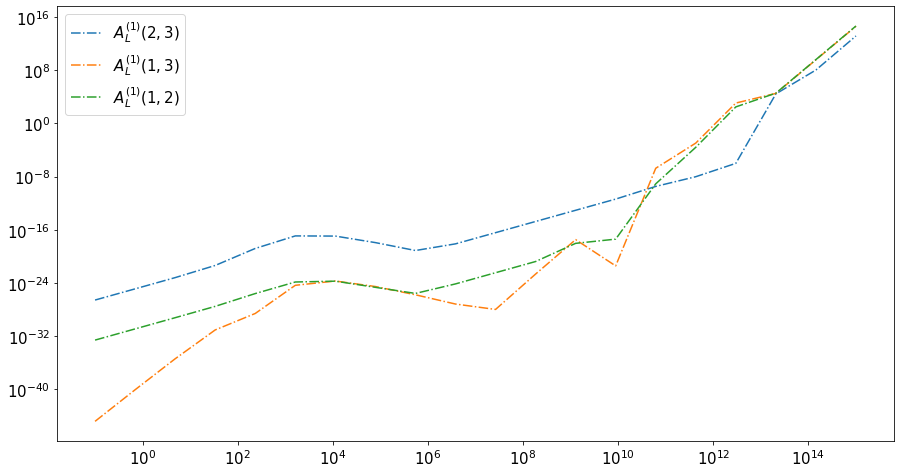

In [52]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),abs(YLOne23)**2,'-.',label='$A_L^{(1)}(2,3)$')
#plt.loglog(np.real(m6np),abs(YLOne32)**2,'--',label='$A_L^{(1)}(3,2)$')

plt.loglog(np.real(m6np),abs(YLOne13)**2,'-.',label='$A_L^{(1)}(1,3)$')
#plt.loglog(np.real(m6np),abs(YLOne31)**2,'--',label='$A_L^{(1)}(3,1)$')

plt.loglog(np.real(m6np),abs(YLOne12)**2,'-.',label='$A_L^{(1)}(1,2)$')
#plt.loglog(np.real(m6np),abs(YLOne21)**2,'--',label='$A_L^{(1)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [27]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [28]:
fsL = lambda k,a,b:TrianglesTwoFermion[k].AL().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
fsR = lambda k,a,b:TrianglesTwoFermion[k].AR().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)

In [29]:
fL = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(fsL(k,a,b)),
                     modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'] )
fR = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(fsR(k,a,b)),
                     modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'] )

In [30]:
fL(0,2,3)(1,2,3,4,5,6)

(-0.00000027247998590854213844099384583421238032773286440032857894900089991919247803179895 + 0.00000016352018180926886301424865222343006675260280399774946471613918548438945707843168j)

In [31]:
def sumatwo(mm6,k,a,b,quirality='L'):
    xs = []
    if quirality=='L':
        g = fL(k,a,b)
    elif quirality=='R':
        g = fR(k,a,b)
    else:
        raise ValueError('quirality must be L or R')
        
    mnk,Unu = diagonalizationMnu1(m1,mm6)
    Cij = lambda i,j: mp.fsum([Unu[c,i]*conj(Unu[c,j]) for c in range(3)])
    for p in range(1,7):
        for q in range(1,7):
            x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],conj(Unu[a-1,p-1]),Cij(p-1,q-1),conj(Cij(p-1,q-1)))
            xs.append(x)
            #print(f'i = {p} and j = {q}')
            #print(f'|f| = {x}')
    return mp.fsum(xs)

In [35]:
def totaltwo(m6,a,b,quirality='L'):
    return sumatwo(m6,0,a,b,quirality) + sumatwo(m6,1,a,b,quirality)

In [36]:
ALTwoTot23 = lambda m6: totaltwo(m6,2,3,'L')
ARTwoTot23 = lambda m6: totaltwo(m6,2,3,'R')

ALTwoTot32 = lambda m6: totaltwo(m6,3,2,'L')
ARTwoTot32 = lambda m6: totaltwo(m6,3,2,'R')

ALTwoTot13 = lambda m6: totaltwo(m6,1,3,'L')
ARTwoTot13 = lambda m6: totaltwo(m6,1,3,'R')

ALTwoTot31 = lambda m6: totaltwo(m6,3,1,'L')
ARTwoTot31 = lambda m6: totaltwo(m6,3,1,'R')

ALTwoTot12 = lambda m6: totaltwo(m6,1,2,'L')
ARTwoTot12 = lambda m6: totaltwo(m6,1,2,'R')

ALTwoTot21 = lambda m6: totaltwo(m6,2,1,'L')
ARTwoTot21 = lambda m6: totaltwo(m6,2,1,'R')

In [37]:
abs(ALTwoTot23(m6np[-1])),abs(sumatwo(m6np[-1],0,2,3,'L')+ sumatwo(m6np[-1],1,2,3,'L'))

(0.00014030508912878032175609972422292510197134847998752268035889621834190915992304946,
 0.00014030508912878032175609972422292510197134847998752268035889621834190915992304946)

## Total Form Factors

In [38]:
#a = 2, b = 3
def ALtot23(m6):
    return  ALOneTot23(m6) + ALTwoTot23(m6)
def ARtot23(m6):
    return  AROneTot23(m6) + ARTwoTot23(m6)

#a = 3, b = 2
def ALtot32(m6):
    return  ALOneTot32(m6) + ALTwoTot32(m6)
def ARtot32(m6):
    return  AROneTot32(m6) + ARTwoTot32(m6)

#a = 1, b = 3
def ALtot13(m6):
    return  ALOneTot13(m6) + ALTwoTot13(m6)
def ARtot13(m6):
    return  AROneTot13(m6) + ARTwoTot13(m6)

#a = 3, b = 1
def ALtot31(m6):
    return  ALOneTot31(m6) + ALTwoTot31(m6)
def ARtot31(m6):
    return  AROneTot31(m6) + ARTwoTot31(m6)

#a = 1, b = 2
def ALtot12(m6):
    return  ALOneTot12(m6) + ALTwoTot12(m6)
def ARtot12(m6):
    return  AROneTot12(m6) + ARTwoTot12(m6)

#a = 2, b = 1
def ALtot21(m6):
    return  ALOneTot21(m6) + ALTwoTot21(m6)
def ARtot21(m6):
    return  AROneTot21(m6) + ARTwoTot21(m6)

## Width decay of $h \to e_a e_b$

In [39]:
from OneLoopLFVHD import Γhlilj

In [40]:
def Γhl2l3(m6):
    return Γhlilj(ALtot23(m6),ARtot23(m6),valores[mh],ml[2],ml[3])
def Γhl3l2(m6):
    return Γhlilj(ALtot32(m6),ARtot32(m6),valores[mh],ml[3],ml[2])

def Γhl1l3(m6):
    return Γhlilj(ALtot13(m6),ARtot13(m6),valores[mh],ml[1],ml[3])
def Γhl3l1(m6):
    return Γhlilj(ALtot31(m6),ARtot31(m6),valores[mh],ml[3],ml[1])

def Γhl1l2(m6):
    return Γhlilj(ALtot12(m6),ARtot12(m6),valores[mh],ml[1],ml[2])
def Γhl2l1(m6):
    return Γhlilj(ALtot21(m6),ARtot21(m6),valores[mh],ml[2],ml[1])

In [41]:
n = 800
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [42]:
%%time
YW23 = speedup_array(Γhl2l3,m6np)
#YW32 = speedup_array(Γhl3l2,m6np)

YW13 = speedup_array(Γhl1l3,m6np)
#YW31 = speedup_array(Γhl3l1,m6np)

YW12 = speedup_array(Γhl1l2,m6np)

#YW21 = speedup_array(Γhl2l1,m6np)

CPU times: user 451 ms, sys: 282 ms, total: 732 ms
Wall time: 3min 35s


In [43]:
Wtot = YW23 + YW13 + YW12 + 0.0032# + YW32 + YW31 + YW21

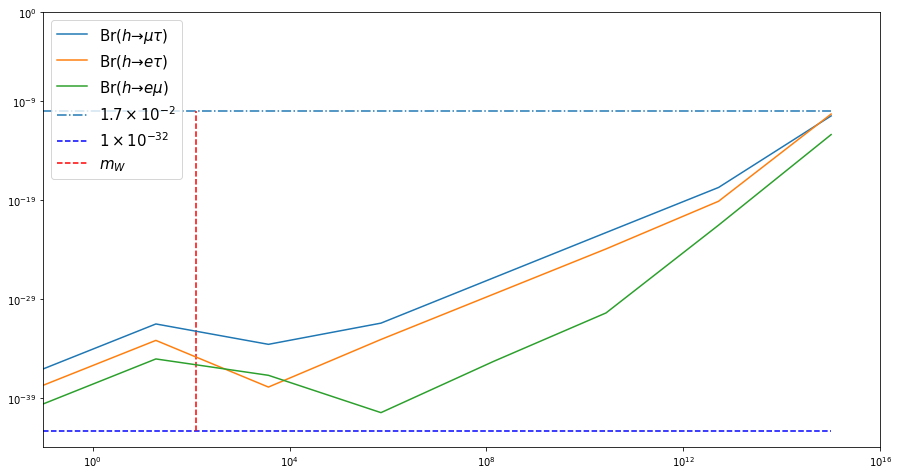

In [44]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),(YW23 #+ YW32
                         )/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(m6np),(YW13 #+ YW31
                         )/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(m6np),(YW12 #+ YW21
                         )/Wtot,label=r'Br($h \to e \mu$)')

#xx = ((YW23 + YW32)/Wtot)[-1]
plt.hlines(1e-10,0.1,1e15,linestyles='-.',label=r'$1.7\times 10^{-2}$')
plt.hlines(5e-43,0.1,1e15,linestyles='--',color='b',label=r'$1\times 10^{-32}$')
plt.vlines(125.1,5e-43,1e-10,linestyles='--',color='r',label=r'$m_W$')
plt.xlim(1e-1,1e15)
plt.yticks([1e-39,1e-29,1e-19,1e-9,1])
plt.xticks([1,1e4,1e8,1e12,1e16])

plt.legend(fontsize=15)

In [37]:
import pandas as pd

In [38]:
df = pd.DataFrame({'m6':m6np,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

In [39]:
df.to_csv('LFVHD-3.txt',sep='\t')

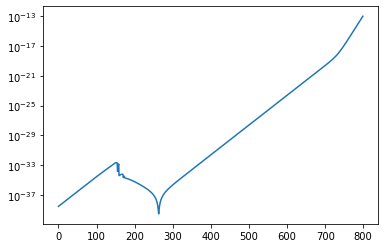

In [40]:
plt.semilogy(np.array(list(map(mpf,df['Whl2l3']))))